In [1]:
import sys
sys.path.append('../Codes/')
sys.path.append('../Codes/Python/')
import numpy as np
import matplotlib.pyplot as plt
from Immuno_models import*
#from Bio import Phylo
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return a - b*(x-c)**2

Text_files_path = '../../../../Dropbox/Research/Evolution_Immune_System/Text_files/'

N_A = 6.02214076e23
k_BT = 1.380649e-23*293
style.use('seaborn-paper')
print(style.available)
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


# The Energy Matrix

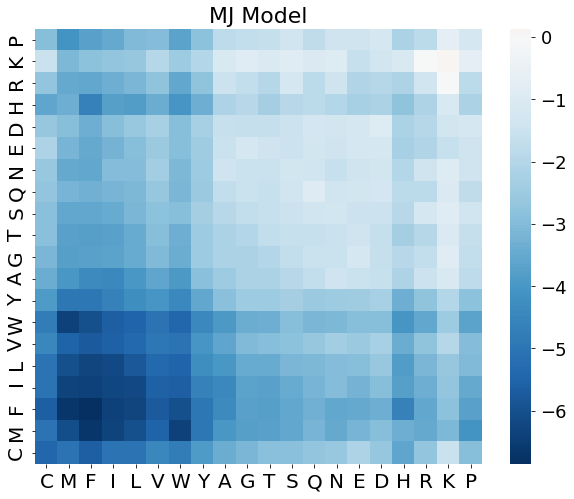

In [2]:
M2 = np.loadtxt(Text_files_path + 'MJ2.txt', skiprows= 1, usecols=range(1,21))
M2_list = M2.tolist()
Alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
Alphabet = np.loadtxt(Text_files_path + 'Alphabet.txt', dtype=bytes, delimiter='\t').astype(str)
Alphabet_list = Alphabet.tolist()
L_alphabet = len(Alphabet)
fig, ax = plt.subplots(figsize=(10,8))
plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'MJ Model', ax = ax)
fig.savefig('../Figures/0_Shape_Space/MJ.png')

## Distribution of energy contributions

12.8303985


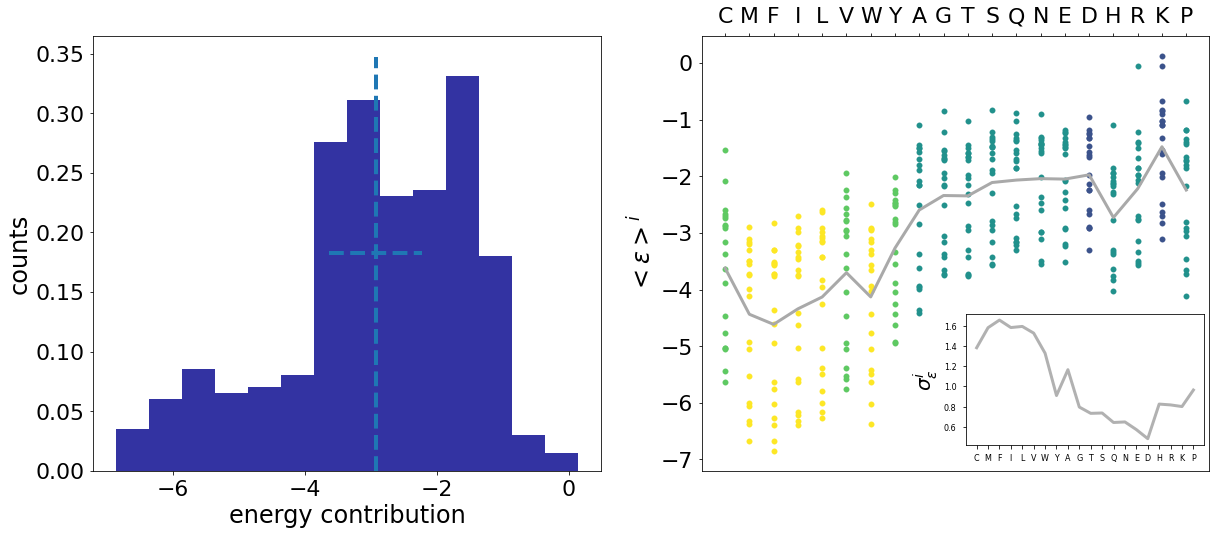

In [3]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
linear_M = np.reshape(M2, (20*20,1))
mean_M = np.mean(linear_M)
var_M = np.var(linear_M)
colors = plt.cm.viridis(np.linspace(0,1,5))
ax[0].hist(linear_M, density = True, bins = 'auto', color = 'darkblue', alpha = 0.8);
ax[0].vlines(mean_M, 0, ax[0].get_ylim()[1], linestyle= 'dashed', linewidth = 4)
ax[0].hlines(ax[0].get_ylim()[1]/2, mean_M - np.sqrt(var_M)/2, mean_M + np.sqrt(var_M)/2, linestyle= 'dashed', linewidth = 4)
ax[0].set_xlabel('energy contribution', fontsize = 24)
ax[0].set_ylabel('counts', fontsize = 24)
ax[0].tick_params(labelsize = 22)
varians = np.array([])
means = np.array([])
for i, column in enumerate(M2_list):
    var_i = np.var(column)
    varians = np.append(varians, var_i)
    mean_i = np.mean(column)
    means = np.append(means, mean_i)
    ax[1].scatter(np.ones(20)*i, column, color = colors[int(abs(mean_i))])

ax[1].plot(range(L_alphabet) , means , color = 'darkgrey', alpha = 1, linewidth = 3);
#ax[1].hist(column, density = True, bins = 'auto', color = 'darkblue', alpha = 0.8);
ax[1].set_ylabel(r'$<{\epsilon}>^i$', fontsize = 24)
#ax[1].set_xlabel('aa', fontsize = 24)
ax[1].xaxis.set_label_position('top') 
ax[1].xaxis.tick_top()
ax[1].set_xticks(range(20))
ax[1].set_xticklabels(Alphabet)
ax[1].tick_params(labelsize = 22)

axin1 = ax[1].inset_axes([.52, 0.06, 0.47, 0.3])
axin1.plot(range(L_alphabet), varians , color = 'darkgrey', alpha = 0.9, linewidth = 3);
#axin1.hist(means, density = True, bins = 'auto', color = 'darkblue', alpha = 0.8);
#axin1.vlines(mean_i, 0, 1, linestyle= 'dashed', linewidth = 4)
#axin1.hlines(ax[0].get_ylim()[1]/2, mean_i - np.sqrt(var_i), mean_i + np.sqrt(var_i), linestyle= 'dashed', linewidth = 4)
axin1.set_ylabel(r'$\sigma^i_{\epsilon}$', fontsize = 20)
#axin1.set_xlabel('aa', fontsize = 24)
axin1.set_xticks(range(20))
axin1.set_xticklabels(Alphabet)
axin1.tick_params(labelsize = 8)
print((np.max(varians)*12 + np.min(varians)*12)/2)

In [4]:
print(np.log10(17**10),np.log10(20**10))

12.30448921378274 13.010299956639813


## Output from MCMC

## Different Ts

<ipython-input-175-c717100c7e51>:16: RuntimeWarning: overflow encountered in exp
  ax.plot(data_E[1][:-1], (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
<ipython-input-175-c717100c7e51>:16: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(data_E[1][:-1], (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));


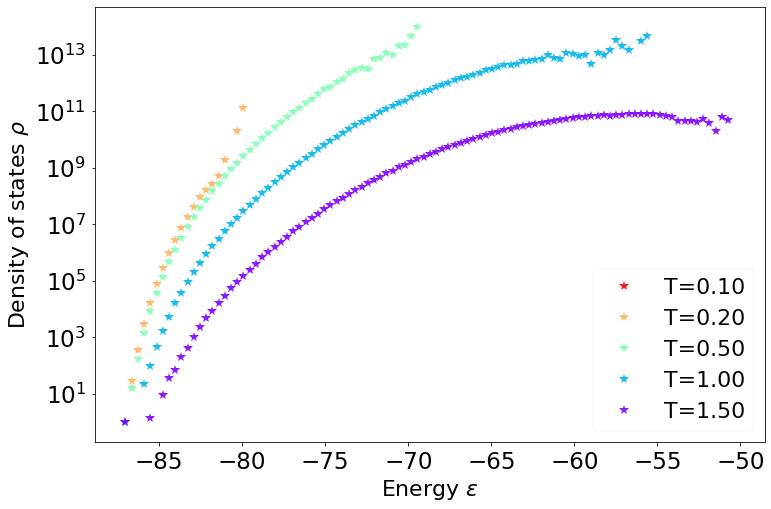

In [175]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
antigen = 'TACNSEYPNTTK'
antigen = 'FMLFMAVFVMTSWYC'
L = 15
N = 1e8
Ts = np.array([0.1, 0.2, 0.5, 1, 1.5])
colors = np.flip(plt.cm.rainbow(np.linspace(0,1,len(Ts))), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])
for i, T in enumerate(Ts):
    energies = (np.loadtxt(Text_files_path + 'MCMC/energies_L-%d_T-%.6f_N-%d_Antigen-'%(L, T, N)+antigen+'.txt'))
    ds = np.linspace(0, L);
    data_E = np.histogram(energies, bins = np.linspace(-87.03, -50, 100), density = False);
    #data_E = np.histogram(energies, bins ='auto', density = False);
    #E_0s = np.append(E_0s, data_E[0][0]/(np.exp(-data_E[1][0]/T)))
    ax.plot(data_E[1][:-1], (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax[1].plot(data_E_2[1][:-1], (data_E_2[0]/(np.exp(-data_E_2[1][:-1]/T)))/(data_E_2[0][0]/(np.exp(-data_E_2[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax[0].plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);
    
#ax.set_ylim(1,4e9)
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 4, fontsize = 22)

fig.savefig('../Figures/Density_of_States_MCMC_BCRs_MJ_T.png')

## Different Ns

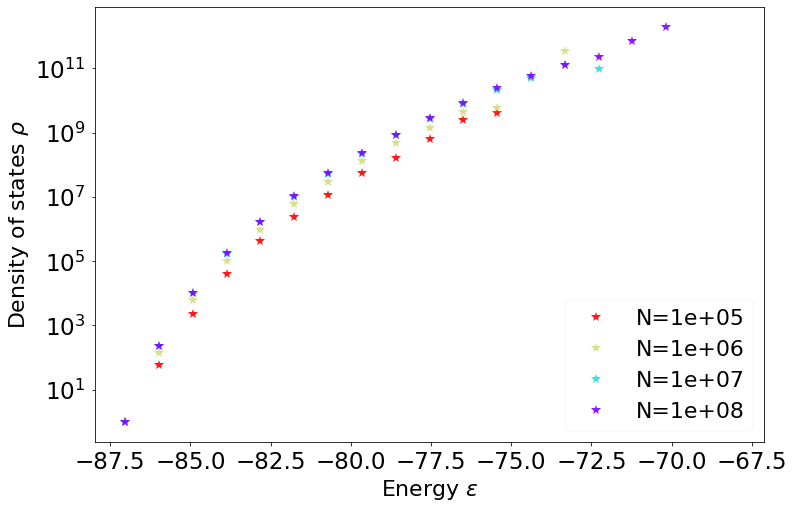

In [181]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
antigen = 'TACNSEYPNTTK'
antigen = 'FMLFMAVFVMTSWYC'
L = 15
Ns = np.logspace(5,8,4)
colors = np.flip(plt.cm.rainbow(np.linspace(0,1,len(Ns))), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])
T = .5
for i, N in enumerate(Ns):
    energies = (np.loadtxt(Text_files_path + 'MCMC/energies_L-%d_T-%.6f_N-%d_Antigen-'%(L, T, N)+antigen+'.txt'))
    ds = np.linspace(0, L);
    data_E = np.histogram(energies, bins =np.linspace(-87.03, -67, 20), density = False);
    ax.plot(data_E[1][:-1], (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "N=%.0e"%(N));

#ax.set_ylim(1,4e9)
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 4, fontsize = 22)

fig.savefig('../Figures/Density_of_States_MCMC_BCRs_MJ_N.png')

In [241]:
antigens = np.array(['IMLWCMYLILWM', 'TACNSEYPNTTK', 'QRKDGPKQKKEN'])
antigen = 'TACNSEYPNTTK'
antigen = 'FMLFMAVFVMTSWYC'
T = .5
L = 15
N_MCMC = 1e8
N_dynamics = 2e3
N_random = 1e4
data_MCMC=np.loadtxt(Text_files_path + 'MCMC/energies_L-%d_T-%.6f_N-%d_Antigen-'%(L,T, N_MCMC)+antigen+'.txt')
data_dynamics_tail=np.loadtxt(Text_files_path + 'Dynamics/ensemble/energies_tail_ensemble_L-%d_N-%d_Antigen-'%(L, N_dynamics)+antigen+'.txt')
data_random=np.loadtxt(Text_files_path + 'Random/energies_random_L-%d_N-%d_Antigen-'%(L, N_random)+antigen+'.txt')


data_MCMC_rho = np.histogram(data_MCMC, bins = 80, density = False) # Creating histograms
data_dynamics_tail_rho = np.histogram(data_dynamics_tail[:,0], bins = 15, density = False) # Creating histograms
data_random_rho = np.histogram(data_random, bins = 20, density = False) # Creating histograms
e_MS = np.min(data_MCMC)
print(e_MS)

-87.03


-56.769999999999996 20.620002


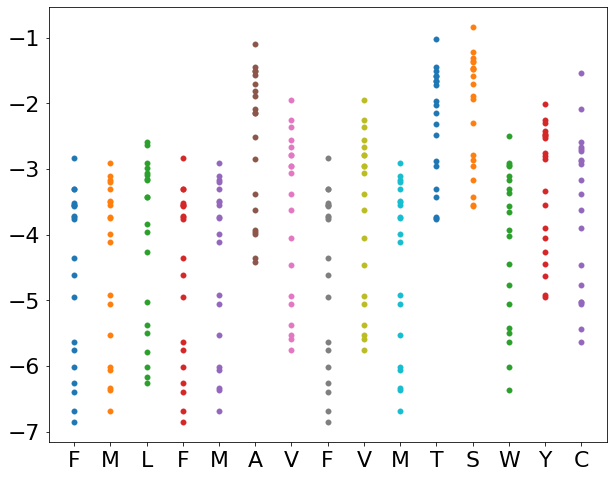

In [242]:
antigen_list = [i for i in antigen]
contributions = np.zeros(shape = (1,20))
fig, ax = plt.subplots(figsize=(10,8))
for i, aa in enumerate(antigen_list):
    index = Alphabet_list.index(aa)
    contributions = np.vstack((contributions, M2[index]))
    ax.scatter(np.ones(20)*i, M2[index])
ax.set_xticks(range(L))
ax.set_xticklabels(antigen)
ax.tick_params(labelsize = 22)
varians = np.var(contributions, axis = 1)
means = np.mean(contributions, axis = 1)
sum_mean = np.sum(means)
sum_var = np.sum(varians)
print(sum_mean, sum_var)

In [243]:
np.log10(20**14)

18.214419939295738

[95.77068499  0.91303879] [ 3.53581053e+01  2.74039871e-02 -5.76553828e+01]
mean =  -57.65538275812088 -56.769999999999996
sigma2 =  18.24552018535873 20.620002
lambda =  1.1150472573648424 1.0295828293324125 0.9130387850317704
b1 =  -0.7162947898841133 b2: -0.7647913904179057
16.41206432423148


6.022927782635012

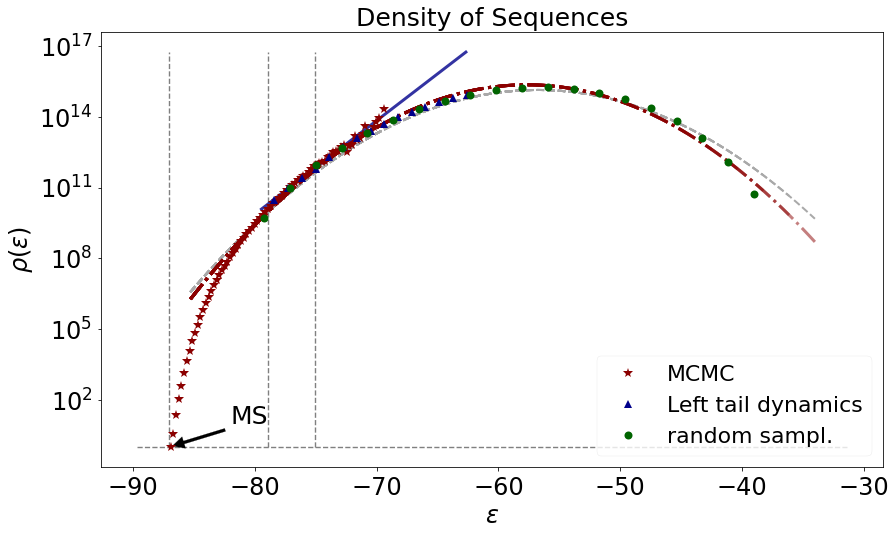

In [253]:
colors = np.flip(plt.cm.rainbow(np.linspace(0,1,3)), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])

naive_range = 5
bcell_range = 12
fig, ax = plt.subplots(figsize = (14,8))

# --------------- MCMC -------dynamics--------
e_max_MCMC = data_MCMC_rho[1][-2]
e_min_MCMC = data_MCMC_rho[1][0]

e_MCMC = data_MCMC_rho[1][:-1] + abs(data_MCMC_rho[1][1:]-data_MCMC_rho[1][:-1])/2
rho_e_MCMC = (data_MCMC_rho[0]/(np.exp(-e_MCMC/T)))/(data_MCMC_rho[0][0]/(np.exp(-e_MCMC[0]/T)))

ax.plot(e_MCMC, rho_e_MCMC, linestyle = "", marker = '*', color = 'darkred', ms = 10, alpha = 1, label = 'MCMC',zorder=20)


# --------------- Dynamics ---------------
e_max_dynamics_tail = data_dynamics_tail_rho[1][-2]
e_min_dynamics_tail = data_dynamics_tail_rho[1][0]

e_dynamics_tail = data_dynamics_tail_rho[1][:-1] + abs(data_dynamics_tail_rho[1][1:]-data_dynamics_tail_rho[1][:-1])/2
rho_e_dynamics_tail = data_dynamics_tail_rho[0]*1e10

ax.plot(e_dynamics_tail, rho_e_dynamics_tail, linestyle = "", marker = '^', color = 'darkblue', ms = 8, alpha = 1, label = 'Left tail dynamics',zorder=20)

# --------------- Random ---------------
e_max_random = data_random_rho[1][-2]
e_min_random = data_random_rho[1][0]

e_random = data_random_rho[1][:-1] + abs(data_random_rho[1][1:]-data_random_rho[1][:-1])/2
rho_e_random = data_random_rho[0]*1e9

ax.plot(e_random, rho_e_random, linestyle = "", marker = 'o', color = 'darkgreen', ms = 8, alpha = 1, label = 'random sampl.',zorder=20)


# --------------- Fits ---------------

e_lineal = e_dynamics_tail[0:-10]
rho_e_lineal = rho_e_dynamics_tail[0:-10]

popt, pcov = curve_fit(my_linear_func, e_lineal, np.log(rho_e_lineal), p0 = (60,1))
popt2, pcov2 = curve_fit(my_quadratic_func, e_random, np.log(rho_e_random), p0=(np.log((20**L)/(np.sqrt(2*np.pi*sum_var))), 1/(2*sum_var), -30))
print(popt,popt2)

e_array = np.linspace(e_min_dynamics_tail-.5, e_max_dynamics_tail+.5, 100)
e_array2 = np.linspace(e_min_random-5, e_random+5, 100)

ax.plot(e_array, np.exp(my_linear_func(e_array, *popt)), linestyle = "-", color = 'darkblue', linewidth = 3, alpha = 0.8,zorder=10)
ax.plot(e_array2, np.exp(my_quadratic_func(e_array2, *popt2)), linestyle = "-.", color = 'darkred', linewidth = 3, alpha = 0.5,zorder=10)

ax.plot(e_array2, np.exp(my_quadratic_func(e_array2, 0.82*np.log((20**L)/(np.sqrt(2*np.pi*sum_var))), 1/(2*sum_var), sum_mean)), linestyle = "--", color = 'darkgrey', linewidth = 2)

# Two set of lines
#ax.vlines([e_MS,e_MS+bcell_range, e_MS+bcell_range-naive_range], 1, ax.get_ylim()[1], color = 'grey', linestyle='dashed')
ax.vlines([e_MS,e_min_dynamics_tail, e_MS+bcell_range], 1, ax.get_ylim()[1], color = 'grey', linestyle='dashed')


ax.annotate('MS', xy=(e_MS,1), xytext = (e_MS + 5, 10), fontsize = 25, arrowprops=dict(facecolor='black', shrink=0.05, width = 3))

ax.set_title('Density of Sequences', fontsize = 25)
ax.set_xlabel(r'$\epsilon$', fontsize = 24)
ax.set_ylabel(r'$\rho(\epsilon)$', fontsize = 24)
ax.tick_params(labelsize = 24)
ax.set_yscale('log')
#ax.set_ylim(bottom=0.5)
ax.hlines(1,ax.get_xlim()[0], ax.get_xlim()[1], linestyle = 'dashed', color = 'grey')
ax.legend(loc = 4, fontsize = 22)
#ax.set_xlim(-48, -38)
#ax.set_xlim(-48, -38)
print('mean = ', popt2[2], sum_mean)
print('sigma2 = ', (1/(2*popt2[1])), sum_var)
print('lambda = ', -2*popt2[1]*(-78-popt2[2]), -(-78-sum_mean)/(sum_var),  popt[1])
print('b1 = ', -(-42-sum_mean)/(sum_var), 'b2:', -(-41-sum_mean)/(sum_var))

print(np.log10(np.exp(popt2[0])*np.sqrt(2*np.pi*((sum_var)))))
#fig.savefig('../Figures/0_Shape_Space/RHO.png')
np.log10(np.cumsum(data_E[0]*(data_E[1][1:]-data_E[1][:-1]))[-1])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


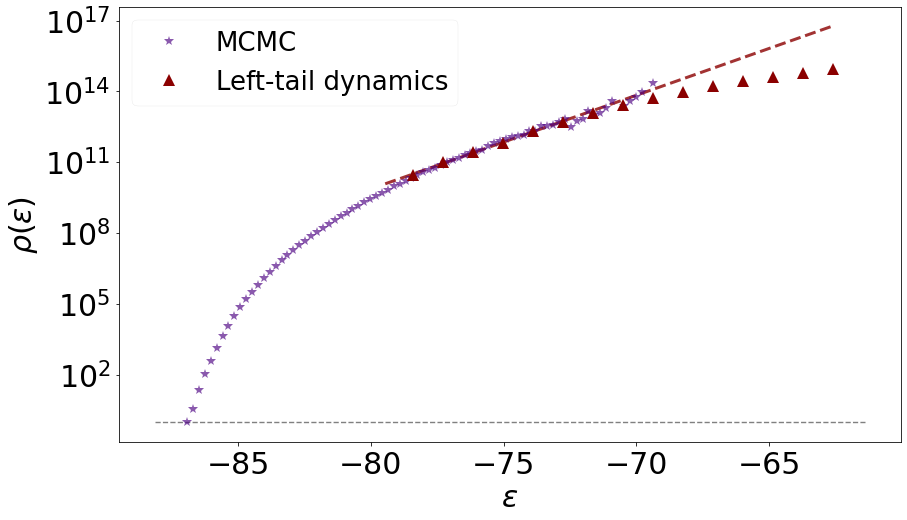

In [255]:
Ns_repertoire = np.array([1e2, 1e3, 1e4, 1e5, 1e6, 20**L])
cumsum_e_MCMC = np.cumsum(rho_e_MCMC*(data_MCMC_rho[1][1:]-data_MCMC_rho[1][:-1]))
es_repertoire = np.array([])
for k, N_repertoire in enumerate(Ns_repertoire[:-1]):
    e_repertoire = np.max(e_MCMC[np.where(cumsum_e_MCMC<(20**L/N_repertoire))])
    es_repertoire = np.append(es_repertoire, e_repertoire)

es_repertoire = np.append(es_repertoire, e_MS)
fig, ax = plt.subplots(figsize = (14,8))
ax.plot(e_MCMC, rho_e_MCMC, linestyle = "", marker = '*', color = 'indigo', ms = 10, alpha = .65, label = 'MCMC',zorder=20)
ax.plot(e_dynamics_tail, rho_e_dynamics_tail, linestyle = "", marker = '^', color = 'darkred', ms = 12, alpha = 1, label = 'Left-tail dynamics',zorder=20)
ax.hlines(1,ax.get_xlim()[0], ax.get_xlim()[1], linestyle = 'dashed', color = 'grey')
ax.plot(e_array, np.exp(my_linear_func(e_array, *popt)), linestyle = "--", color = 'darkred', linewidth = 3, alpha = 0.8,zorder=10)

# Two set of lines
#ax.vlines([e_MS,e_MS+bcell_range, e_MS+bcell_range-naive_range], 1, ax.get_ylim()[1], color = 'grey', linestyle='dashed')
#ax.vlines([e_MS,e_min_dynamics_tail, e_MS+bcell_range], 1, ax.get_ylim()[1], color = 'grey', linestyle='dashed')
#ax.set_title('Density of Sequences', fontsize = 25)
ax.set_xlabel(r'$\epsilon$', fontsize = 30)
ax.set_ylabel(r'$\rho(\epsilon)$', fontsize = 30)
ax.tick_params(labelsize = 30)
ax.set_yscale('log')
ax.legend(fontsize = 26)
fig.savefig('../Figures/0_Shape_Space/rho_MCMC_dynamics.eps')



[3.0364993  0.31696225]


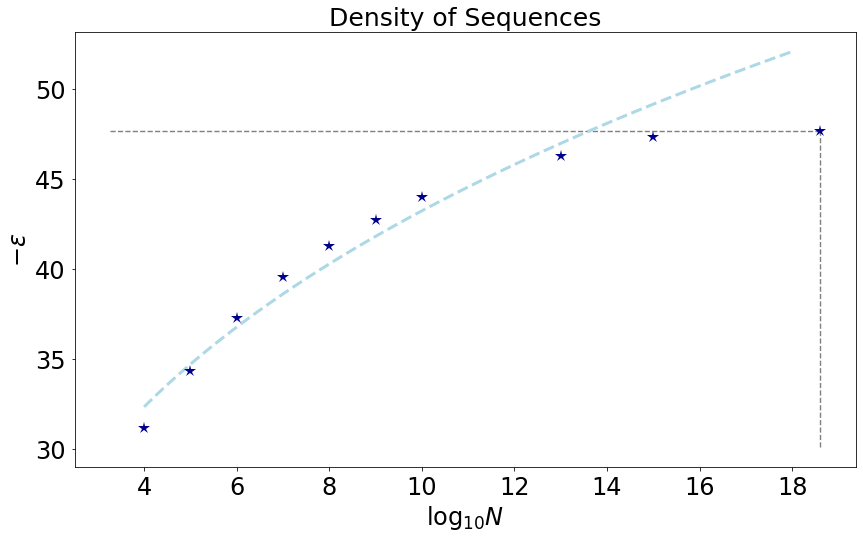

In [84]:
Ns_repertoire = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e10, 1e12, 20**L])*1e3
cumsum_e_MCMC = np.cumsum(rho_e_MCMC*(data_MCMC_rho[1][1:]-data_MCMC_rho[1][:-1]))
es_repertoire = np.array([])
for k, N_repertoire in enumerate(Ns_repertoire[:-1]):
    e_repertoire = np.max(e_MCMC[np.where(cumsum_e_MCMC<(20**L/N_repertoire))])
    es_repertoire = np.append(es_repertoire, e_repertoire)
es_repertoire = np.append(es_repertoire, e_MS)
fig, ax = plt.subplots(figsize = (14,8))
ax.plot(np.log10(Ns_repertoire[:]), -es_repertoire[:], linestyle = "", marker = '*', color = 'darkblue', ms = 12, alpha = 1, label = 'MCMC',zorder=20)

popt, pcov = curve_fit(my_linear_func, np.log(np.log10(Ns_repertoire[:-1])), np.log(-es_repertoire[:-1]))

N_array=np.linspace(4, 18, 100)
ax.plot(N_array, np.exp(my_linear_func(np.log(N_array), *popt)), linestyle = "--", color = 'lightblue', linewidth = 3, alpha = 1,zorder=10)

ax.hlines(-e_MS,ax.get_xlim()[0], np.log10(20**L*1e3), linestyle = 'dashed', color = 'grey')
ax.vlines(np.log10(20**L*1e3), ax.get_ylim()[0], -e_MS, linestyle = 'dashed', color = 'grey')


print(popt)

ax.set_title('Density of Sequences', fontsize = 25)
ax.set_xlabel(r'$\log_{10}{N}$', fontsize = 24)
ax.set_ylabel(r'$-\epsilon$', fontsize = 24)
ax.tick_params(labelsize = 24)
#ax.set_xscale('log')
#ax.set_yscale('log')


## $b(N)$

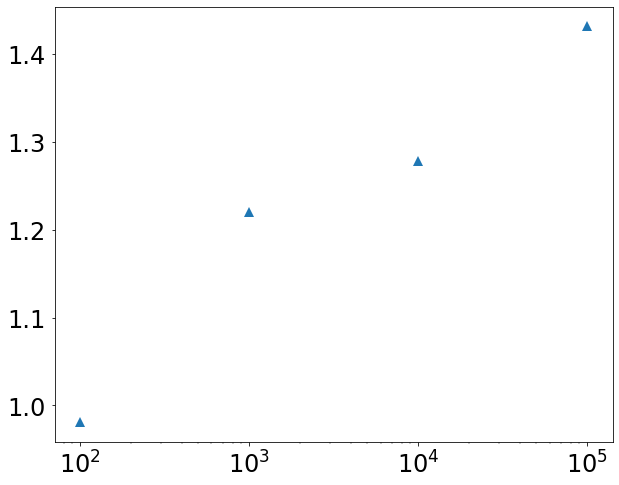

In [21]:
antigens = np.array(['IMLWCMYLILWM', 'TACNSEYPNTTK', 'QRKDGPKQKKEN'])
antigen = 'TACNSEYPNTTK'
T = .5
L = 12
Ns_dynamics = np.array([1e2, 1e3, 1e4, 1e5])
bs = np.array([])
for N_dynamics in Ns_dynamics:
    data_dynamics_tail=np.loadtxt(Text_files_path + 'Dynamics/ensemble/energies_tail_ensemble_L-%d_N-%d_Antigen-'%(L, N_dynamics)+antigen+'.txt')
    data_dynamics_tail_rho = np.histogram(data_dynamics_tail[:,0], bins = 10, density = False) # Creating histograms
    #e_max_dynamics_tail = data_dynamics_tail_rho[1][-2]
    #e_min_dynamics_tail = data_dynamics_tail_rho[1][0]

    e_dynamics_tail = data_dynamics_tail_rho[1][:-1] + abs(data_dynamics_tail_rho[1][1:]-data_dynamics_tail_rho[1][:-1])/2
    rho_e_dynamics_tail = data_dynamics_tail_rho[0]*1e10
    e_lineal = e_dynamics_tail[:8]
    rho_e_lineal = rho_e_dynamics_tail[:8]
    popt, pcov = curve_fit(my_linear_func, e_lineal, np.log(rho_e_lineal), p0 = (60,1))
    bs = np.append(bs, popt[1])
    
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(Ns_dynamics, bs, marker = '^', linestyle = '', ms = 10)
ax.tick_params(labelsize = 24)
#ax.set_yscale('log')
ax.set_xscale('log')



[78.26962392  0.89093472]


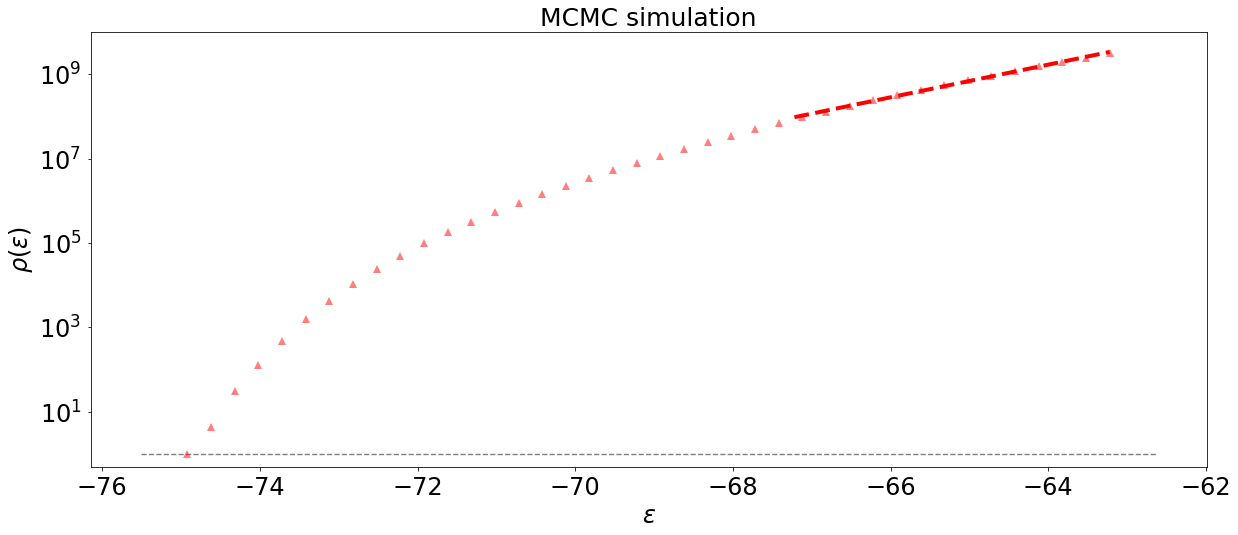

In [27]:
L = 12
N = 1e8
colors = np.flip(plt.cm.rainbow(np.linspace(0,1,3)), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])
T = .8
naive_range = 4
master_sequences = np.array(['IMLWCMYLILWM', 'TACNSEYPNTTK', 'QRKDGPKQKKEN'])
master_sequence = 'IMLWCMYLILWM'

fig, ax = plt.subplots(figsize = (20,8))
data=(np.loadtxt(Text_files_path + 'MCMC/output_L-%d_T-%.6f_N-%d_Antigen-'%(L,T, N)+master_sequence+'.txt'))
E = data[:,0] # Column with energies from text file
data_E = np.histogram(E, bins = 40, density = False) # Creating histograms
e_max = data_E[1][-2]
e_array = np.linspace(e_max-naive_range, e_max, 100)    
rho_e = (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T)))
e = data_E[1][:-1]
e2 = e[np.where(e>(e_max-naive_range))]
rho_e2 = rho_e[np.where(e>(e_max-naive_range))]
popt, pcov = curve_fit(my_linear_func, e2, np.log(rho_e2), p0 = (60,1))
print(popt)
ax.plot(e, rho_e, linestyle = "", marker = markers[0], color = colors[0], ms = 8, alpha = .5)
ax.plot(e_array, np.exp(my_linear_func(e_array, *popt)), linestyle = "--", color = colors[0], linewidth = 4)
ax.set_title('MCMC simulation', fontsize = 25)
ax.set_xlabel(r'$\epsilon$', fontsize = 24)
ax.set_ylabel(r'$\rho(\epsilon)$', fontsize = 24)
ax.tick_params(labelsize = 24)
ax.set_yscale('log')
ax.set_ylim(bottom=0.5)
ax.hlines(1,ax.get_xlim()[0], ax.get_xlim()[1], linestyle = 'dashed', color = 'grey')
fig.savefig('../Figures/0_Shape_Space/rho.png')

In [10]:
L = 9
N = 1e8
colors = np.flip(plt.cm.rainbow(np.linspace(0,1,len(Ts))), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])
T = 1
data=(np.loadtxt(Text_files_path + 'output_highT_N-%d.txt'%(N)))
E = data[:,0]
ds = np.linspace(0, L);
data_E = np.histogram(E, bins =np.linspace(-42.7, -18, 100), density = False);
#data_E = np.histogram(E, bins = 'auto', density = False);

b1 =  3.3676706655180557 b2 =  1.3379792315571726


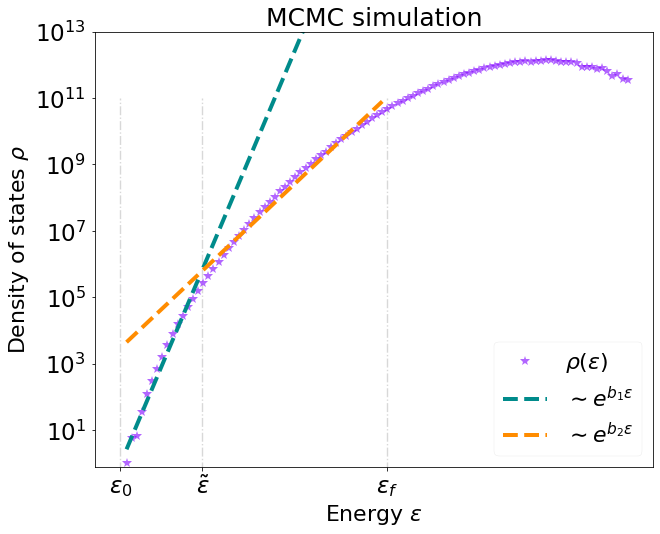

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))

deltaE = abs(-43+18)/100
E_0s = np.append(E_0s, data_E[0][0]/(np.exp(-data_E[1][0]/T)))
ax.plot(data_E[1][:-1], (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T))), color = colors[-1], linestyle = '', marker = '*', ms = 10, alpha = 0.6, label = r"$\rho(\epsilon)$" );

ax.set_title('MCMC simulation', fontsize = 25)
e1 = 43
e2 = 39
e3 = 30

rho_e = (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T)))
rho_e_1 = rho_e[np.where((data_E[1][:-1]>-e1) & (data_E[1][:-1]<-e2))]
e_1 = data_E[1][:-1][np.where((data_E[1][:-1]>-e1) & (data_E[1][:-1]<-e2))]
rho_e_2 = rho_e[np.where((data_E[1][:-1]>-e2) & (data_E[1][:-1]<-e3))]
e_2 = data_E[1][:-1][np.where((data_E[1][:-1]>-e2) & (data_E[1][:-1]<-e3))]

#ax.plot(e_1, rho_e_1, color = colors[-2], linestyle = '', marker = '*', ms = 10, alpha = 1);
#ax.plot(e_2, rho_e_2, color = colors[-3], linestyle = '', marker = '*', ms = 10, alpha = 1);


popt1, pcov1 = curve_fit(my_linear_func, e_1, np.log(rho_e_1))
popt2, pcov2 = curve_fit(my_linear_func, e_2, np.log(rho_e_2))


#ax.plot(e, np.exp(my_quadratic_func(e,*popt)), color = colors[-2], linewidth = 3, linestyle = '--', marker = '', ms = 10, alpha = 1);
ax.plot(e_1, np.exp(my_linear_func(e_1,*popt1)), color = 'darkcyan', linewidth = 4, linestyle = '--', marker = '', ms = 10, alpha = 1, label = r'$\sim e^{b_{1}\epsilon}$');
ax.plot(e_2, np.exp(my_linear_func(e_2,*popt1)), color = 'darkcyan', linewidth = 4, linestyle = '--', marker = '', ms = 10, alpha = 1);


ax.plot(e_2, np.exp(my_linear_func(e_2,*popt2)), color = 'darkorange', linewidth = 4, linestyle = '--', marker = '', ms = 10, alpha = 1, label = r'$\sim e^{b_{2}\epsilon}$');
ax.plot(e_1, np.exp(my_linear_func(e_1,*popt2)), color = 'darkorange', linewidth = 4, linestyle = '--', marker = '', ms = 10, alpha = 1);
ax.vlines([-e1, -e2, -e3], 0, 1e11, color = 'grey', linestyle = '-.', alpha = .3)

#ax.set_xlim(-43, -25)
ax.set_ylim(0.8, 1e13)
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.set_xticks([-e1, -e2, -e3])
ax.set_xticklabels([r'$\epsilon_0$', r'$\tilde{\epsilon}$', r'$\epsilon_f$'])
ax.tick_params(labelsize = 23)
ax.legend(loc = 4, fontsize = 22)
#fig.savefig('../Figures/density_seqs_MCMC_exponential.png')

print('b1 = ', popt1[1], 'b2 = ', popt2[1])

## This need to be copied later in the other notebook

4.7066642366754055 6.30195997717747 9.90195997717747


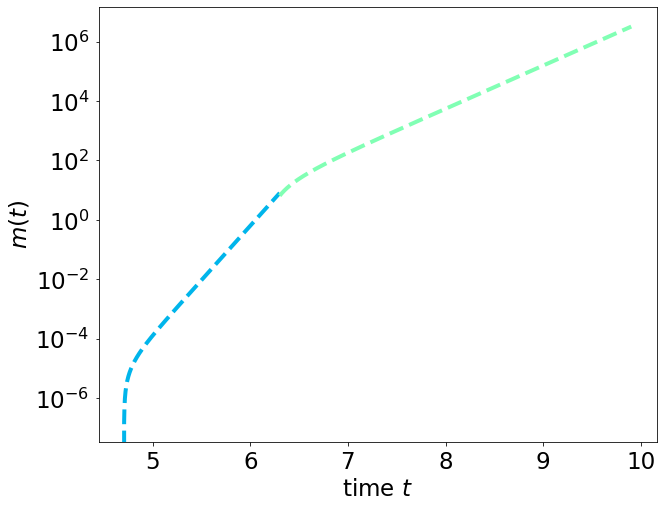

In [12]:
beta = 2.5

t1 = (-popt1[0]/popt1[1] + np.log(N_A))/beta
t2 = (-e2 + np.log(N_A))/beta
t3 = (-e3 + np.log(N_A))/beta


print(t1, t2, t3)
t_1 = np.linspace(t1,t2,1000)
t_2 = np.linspace(t2,t3,1000)

t0 = 4
b1 = popt1[1]
b2 = popt2[1]

alpha2 = np.exp(popt2[0])*np.exp(b2*(-popt1[0]/popt1[1]))

delta = 1e-4

m1 = delta*(np.exp(b1*beta*(t_1-t1))-1)/(b1*beta)
m2 = delta*(((alpha2*np.exp(b2*beta*(t_2-t1)))/(beta*b2)) + ((np.exp(beta*b1*(t2-t1))*(1/b1 - 1/b2))/(beta)) - ((1)/(beta*b1)))

fig, ax = plt.subplots(1, 1, figsize = (10,8))
ax.plot(t_1, m1, color = colors[-2], linewidth = 4, linestyle = '--')
ax.plot(t_2, m2, color = colors[-3], linewidth = 4, linestyle = '--')
ax.tick_params(labelsize = 23)
ax.set_xlabel(r'time $t$', fontsize = 23)
ax.set_ylabel(r'$m(t)$', fontsize = 23)
ax.set_yscale('log')

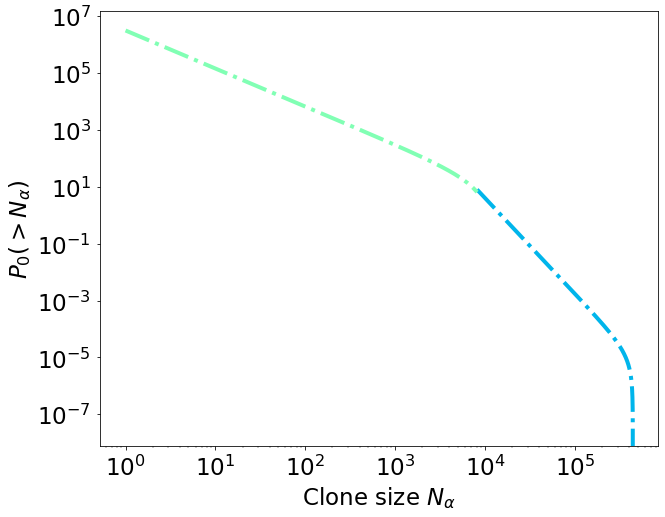

In [13]:
beta = 2.5
nu = 2.5

N_alpha1 = np.linspace(np.exp(nu*(t3-t2)), np.exp(nu*(t3-t1)), 1000)
N_alpha2 = np.linspace(np.exp(nu*(t3-t3)), np.exp(nu*(t3-t2)), 1000)

m1 = delta*(np.exp(b1*beta*(t3-t1))*N_alpha1**(-(beta*b1)/(nu))-1)/(b1*beta)
m2 = delta*(((alpha2*np.exp(b2*beta*(t3-t1))*N_alpha2**(-(beta*b2)/(nu)))/(beta*b2)) + ((np.exp(beta*b1*(t2-t1))*(1/b1 - 1/b2))/(beta)) - ((1)/(beta*b1)))

fig, ax = plt.subplots(1, 1, figsize = (10,8))
ax.plot(N_alpha1, m1, color = colors[-2], linewidth = 4, linestyle = '-.')
ax.plot(N_alpha2, m2, color = colors[-3], linewidth = 4, linestyle = '-.')
ax.tick_params(labelsize = 23)
ax.set_xlabel(r'Clone size $N_\alpha$', fontsize = 23)
ax.set_ylabel(r'$P_0(>N_\alpha)$', fontsize = 23)
ax.set_xscale('log')
ax.set_yscale('log')


## Different energetic regions for the MS

In [136]:
L = 15
N = 1e6
master_sequences_energies = np.loadtxt(Text_files_path+'MS_energies_L-%d_N-%d.txt'%(int(L), int(N)))
data_MS = np.histogram(master_sequences_energies, density = True, bins = 50)

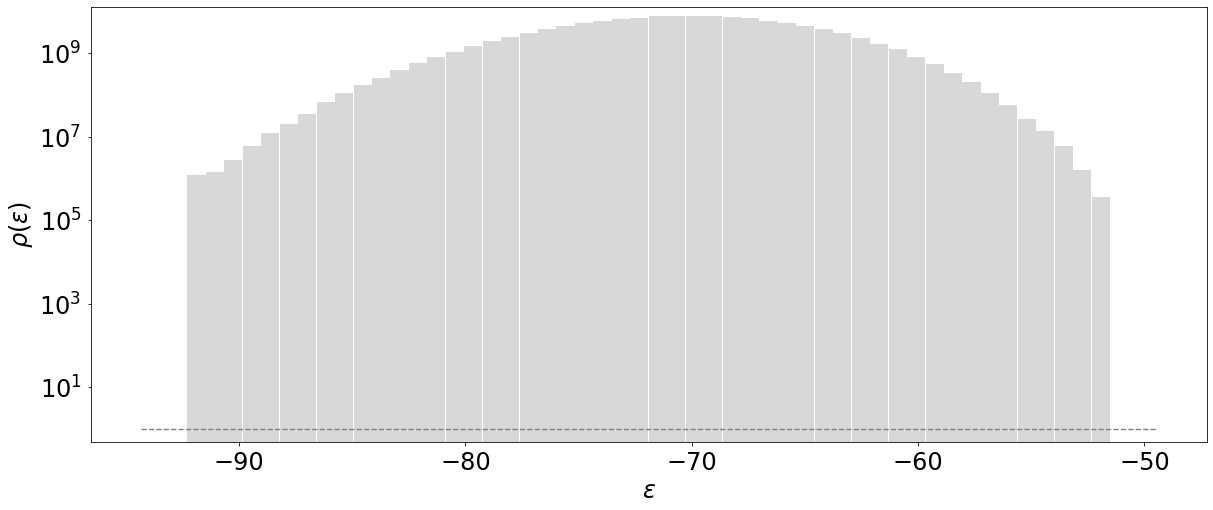

In [137]:

colors = np.flip(plt.cm.rainbow(np.linspace(0,1,3)), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])
T = .8
naive_range = 4
#antigens = ['IMLWCMYLILWM', 'TACNSEYPNTTK', 'QRKDGPKQKKEN'] # L = 12
antigens = ['FVMCPFMLFMFYAVW', 'FMLFMAVFVMTSWYC', 'SFAAVIGSRETSWYC'] # L = 15

fig, ax = plt.subplots(figsize = (20,8))
#for i, antigen in enumerate(antigens):
    #data=(np.loadtxt(Text_files_path + 'output_L-%d_T-%.6f_N-%d_Antigen-'%(L,T, N)+antigen+'.txt'))
    #E = data[:,0] # Column with energies from text file
    #data_E = np.histogram(E, bins = 40, density = False) # Creating histograms
    #e_max = data_E[1][-2]
    #e_array = np.linspace(e_max-naive_range-1, e_max+1, 100)    
    #rho_e = (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T)))
    #e = data_E[1][:-1]
    #e2 = e[np.where(e>(e_max-naive_range))]
    #rho_e2 = rho_e[np.where(e>(e_max-naive_range))]
    #popt, pcov = curve_fit(my_linear_func, e2, np.log(rho_e2), p0 = (60,1))
    #print(popt)
    #ax.plot(e, rho_e, linestyle = "", marker = markers[i], color = colors[i], ms = 6, alpha = .6)
    #ax.plot(e_array, np.exp(my_linear_func(e_array, *popt)), linestyle = "--", color = colors[i], linewidth = 4)
    
ax.set_xlabel(r'$\epsilon$', fontsize = 24)
ax.set_ylabel(r'$\rho(\epsilon)$', fontsize = 24)
ax.tick_params(labelsize = 24)
ax.set_yscale('log')
ax.bar(data_MS[1][:-1], data_MS[0]*1e11, color = 'grey', alpha = 0.3)
ax.set_ylim(bottom=0.5)
ax.hlines(1,ax.get_xlim()[0], ax.get_xlim()[1], linestyle = 'dashed', color = 'grey')
fig.savefig('../Figures/0_Shape_Space/range_MS.png')

# other plots

## Sequences generated from the MS

In [ ]:
%%time
L = 9
n_seqs = np.array([1e2, 1e3, 1e4, 1e5, 1e6])
Array_Sequences = []

for n_seq in n_seqs:
    Sequences = pickle.load( open( Text_files_path + "Sequences_MJ2_L-%d_n_seq-%d.pkl"%(L, n_seq), "rb" ) )
    Array_Sequences.append(Sequences)
    print('Master Seq:', Sequences[0].sequence, 'Antigen Seq:', Sequences[0].complementary_sequence)
    
Array_Sequences = np.array(Array_Sequences, dtype = Sequence)

In [ ]:
for k, Sequences in enumerate(Array_Sequences):
    fig1, ax1 = plt.subplots(1,1,figsize=(10,8))
    distances = plot_histogram_hamming_distance(Sequences = Sequences, ax = ax1)
    plt.close()
    
fig, ax = plt.subplots(1,1,figsize=(10,8))
colors = plt.cm.Reds(np.linspace(0,1,len(n_seqs)))
for k, Sequences in enumerate(Array_Sequences):
    energies, data_energies = plot_histogram_energy(Sequences = Sequences, normalization = 1, bins = 'auto', color = colors[k], n_seq = n_seqs[k], density = True, ax = ax)
#ax.set_xlim(np.min(energies),np.min(energies)+8 )
#ax.set_yscale('linear')

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10, 8))
ds = np.array(range(1,10))
for k, Sequences in enumerate(Array_Sequences):
    #calculate mean energy given d
    mean_energies_given_d = np.array([])

    for d in ds:
        temp_array = [Sequences[i].energy for i in range(int(len(Sequences))) if (Sequences[i].hamming_distance == d)]
        mean_energy_given_d = np.mean(temp_array)
        var_energy_given_d = np.var(temp_array)
        mean_energies_given_d = np.append(mean_energies_given_d, mean_energy_given_d)
        
    #___________________________________________
    #plot_scatter_hamming_distance_energy(distances = distances, energies = energies, color = 'steelblue', ax = ax)
    #plot_scatter_hamming_distance_energy(distances = distances_left_tail_8, energies = energies_left_tail_8, color = 'olivedrab', ax = ax)
    ax.scatter(range(1,10), mean_energies_given_d, color = colors[k], s = 120, marker = '*', label = 'N=%.e'%(n_seqs[k]))
    ax.vlines(range(1,10), mean_energies_given_d-np.sqrt(var_energy_given_d), mean_energies_given_d+np.sqrt(var_energy_given_d), color = colors[k], linestyle = '--')
    ax.hlines(np.min(energies)+8, 0, 9, color = 'olive', linestyle = '--')
    ax.legend(loc = 0, fontsize = 22)
    
#-------------------------------------------------
# Fit the mean value to a linear function
popt, pcov = curve_fit(my_linear_func, ds, mean_energies_given_d)

ax.plot(ds, my_linear_func(ds, *popt), linewidth = 2, linestyle = '--', color = 'black')



## Sequences generated randomly

In [ ]:
%%time
L = 9
n_seqs = np.array([1e2, 1e3, 1e4, 1e5, 1e6])
Array_Sequences_random = []

for n_seq in n_seqs:
    Sequences = pickle.load( open( Text_files_path + "Sequences_random_MJ2_L-%d_n_seq-%d.pkl"%(L, n_seq), "rb" ) )
    for Sequence_i in Sequences:
        Sequence_i.hamming_distance = hamming_distance(Sequence_i.sequence, Sequence_i.complementary_sequence)
    Array_Sequences_random.append(Sequences)
    print('Master Seq:', Sequences[0].sequence, 'Antigen Seq:', Sequences[0].complementary_sequence)

Array_Sequences_random = np.array(Array_Sequences_random, dtype = Sequence)




In [ ]:
for k, Sequences in enumerate(Array_Sequences_random):
    fig1, ax1 = plt.subplots(1,1,figsize=(10,8))
    distances = plot_histogram_hamming_distance(Sequences = Sequences, ax = ax1)
    plt.close()

fig, ax = plt.subplots(1,1,figsize=(10,8))
colors = plt.cm.Reds(np.linspace(0,1,len(n_seqs)))
min_seqs = np.array([])
for k, Sequences in enumerate(Array_Sequences_random):
    energies, data_energies = plot_histogram_energy(Sequences = Sequences, normalization = 1, bins = 'auto', color = colors[k], n_seq = n_seqs[k], density = True, ax = ax)
    min_energy = np.min(energies)
    min_seqs = np.append(min_seqs, [i.sequence for i in Sequences if (i.energy == min_energy)])
    
min_seqs
#ax.set_yscale('linear')

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10, 8))

for k, Sequences in enumerate(Array_Sequences_random):
    #calculate mean energy given d
    mean_energies_given_d = np.array([])

    for d in range(1,10):
        temp_array = [Sequences[i].energy for i in range(int(len(Sequences))) if (Sequences[i].hamming_distance == d)]
        mean_energy_given_d = np.mean(temp_array)
        var_energy_given_d = np.var(temp_array)
        mean_energies_given_d = np.append(mean_energies_given_d, mean_energy_given_d)
    #-------------------------------------------------- 
    #___________________________________________
    #plot_scatter_hamming_distance_energy(distances = distances, energies = energies, color = 'steelblue', ax = ax)
    #plot_scatter_hamming_distance_energy(distances = distances_left_tail_8, energies = energies_left_tail_8, color = 'olivedrab', ax = ax)
    ax.scatter(range(1,10), mean_energies_given_d, color = colors[k], s = 120, marker = '*', label = 'N=%.e'%(n_seqs[k]))
    ax.vlines(range(1,10), mean_energies_given_d-np.sqrt(var_energy_given_d), mean_energies_given_d+np.sqrt(var_energy_given_d), color = colors[k], linestyle = '--')
    ax.hlines(np.min(energies)+8, 0, 9, color = 'olive', linestyle = '--')
    ax.legend(loc = 0, fontsize = 22)

ax.plot(ds, my_linear_func(ds, *popt), linewidth = 2, linestyle = '--', color = 'black')

In [2]:
np.log(1E8)

18.420680743952367

## Range of energies ; $\epsilon_{best} - \epsilon_{worst}$

In [ ]:
%%time
L = 9
n_seqs = np.array([5e5])
fig, ax = plt.subplots(figsize=(10,8))

for n_seq in n_seqs:
    range_energies = pickle.load(open(Text_files_path+'range_energies_MJ2_L-%d_n_seq-%d.pkl'%(int(L), int(n_seq)), 'rb'))
    ax.hist(range_energies, density = True, bins = 'auto', label = 'n_seq=%.e'%(n_seq));
ax.legend(loc = 0, fontsize = 22)

## Master sequence energy distribution

In [ ]:
%%time
L = 12
n_seqs = np.array([1e8])
fig, ax = plt.subplots(figsize=(10,8))

for n_seq in n_seqs:
    master_sequences_energies = np.loadtxt(Text_files_path+'MS_energies_L-%d_N-%d.txt'%(int(L), int(n_seq)))
    ax.hist(master_sequences_energies, density = True, bins = 'auto', label = 'n_seq=%.e'%(n_seq));
ax.legend(loc = 0, fontsize = 22)
ax.set_yscale('log')